# Como prever o valor de uma casa na califórnia de 1990?

### TODO

De volta aos anos 90, você é dono de uma corretora de imóveis. Seus corretores, conseguem prever o valor médio de uma casa em um certo distrito, dado algumas informações sobre esse distrito. A previsão dos seus corretores atualmente, possui um erro 30%. Você estuda a possibilidade de automatizar esse processo, tornando ele mais preciso ou ao menos reduzindo custo.

Seus primeiros passos são:

* Análise exploratória dos dados que você tem em mãos do censo
* Verificar se há outliers e tratá-los como julgar melhor
* Tratar dados faltantes
* Remover dados duplicados
* Remover dados inconsistentes (Exemplos onde as features são iguais, porém o valor alvo, isto é, a label, é diferente)
* Verificar a escala dos dados
* Verificar o resultado de um modelo básico (Regressão Linear)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
houses_data = pd.read_csv("housing_raw.csv")

In [5]:
houses_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-117.46,33.94,35.0,1566.0,294.0,1056.0,279.0,3.5227,2000.0,INLAND
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [11]:
houses_data.shape


(20656, 10)

In [12]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20656 entries, 0 to 20655
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20656 non-null  float64
 1   latitude            20656 non-null  float64
 2   housing_median_age  20656 non-null  float64
 3   total_rooms         20656 non-null  float64
 4   total_bedrooms      20449 non-null  float64
 5   population          20656 non-null  float64
 6   households          20656 non-null  float64
 7   median_income       20656 non-null  float64
 8   median_house_value  20656 non-null  float64
 9   ocean_proximity     20656 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
houses_data.fillna(houses_data.total_bedrooms.mean(), inplace=True)

In [37]:
houses_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [56]:
houses_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20656.000000,20656.000000,20656.000000,20656.000000,20656.000000,20656.000000,20656.000000,20656.000000,20656.000000
mean,-119.571026,35.633036,28.698877,2635.309498,537.809184,1425.141847,499.489446,388.668997,206874.901336
std,2.003880,2.135909,13.374948,2180.992694,419.161544,1132.139892,382.235005,1281.027326,115405.411300
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,2000.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.659100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.745050,179700.000000
75%,-118.010000,37.720000,37.000000,3147.250000,644.000000,1724.000000,605.000000,5.393025,264825.000000
max,-114.310000,41.950000,500.000000,39320.000000,6445.000000,35682.000000,6082.000000,13947.000000,500001.000000


Text(0.5, 0, 'x')

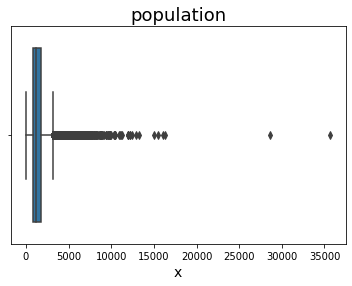

In [40]:
import seaborn as sns

ax = sns.boxplot(x = 'population',
                 data = houses_data)

#ax.figure.set_size_inches(14,6)
ax.set_title('population', fontsize=18)
ax.set_xlabel('x', fontsize=14)

(array([ 262., 3490., 3971., 4254., 2914., 1935., 1262.,  824.,  486.,
        1258.]),
 array([  2000. ,  51800.1, 101600.2, 151400.3, 201200.4, 251000.5,
        300800.6, 350600.7, 400400.8, 450200.9, 500001. ]),
 <a list of 10 Patch objects>)

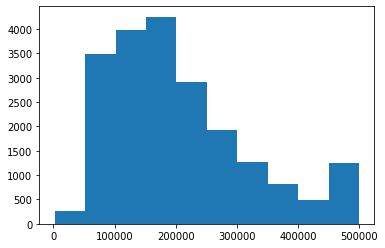

In [55]:
import matplotlib.pyplot as plt

plt.hist(houses_data.median_house_value)